# 2. Labos uživo -Numerička matematika

Ime i prezime: Ivan Futivić

1 . Zadani su podaci 
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.15&2.3 &3.15 & 4.85 & 6.25 & 7.95\\ \hline
y_i &4.79867& 4.49013 & 4.2243 & 3.47313 & 2.66674 & 1.51909\end{array}$$
koji predstavljaju vrijednost funkcije $f(x)=4.8 \cos \frac{\pi x}{20}$.  Odredite Lagrangeov interpolacijski polinom koristeći funkciju [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html), te grafički prikažite polinom i funkciju f(x), na istom grafu. (za pomoc mozete pogledati i prvu Jupyter bilježnicu vezanu za interpolaciju u predavanjima)

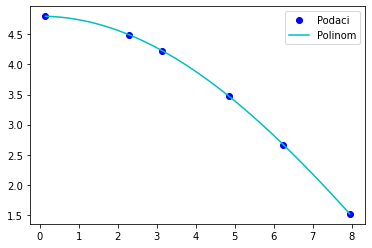

In [3]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
# dalje sami....
# vektor za grafički prikaz xp = np.linspace(0.15, 7.95, 100) U ovom vektoru 
#izvrijednite funkciju i polonom i prikažite grafički.

xp = np.linspace(0.15, 7.95, 100)

poly = lagrange(xData, yData)

plt.plot(xData, yData, 'bo', label='Podaci')
plt.plot(xp, poly(xp), 'c-', label='Polinom')

plt.legend(loc='upper right')

  2 . Za podatke
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.1&0.2 &0.3 & 0.4 & 0.5 & 0.6& 0.7 & 0.8 & 0.9 & 1.0\\ \hline
y_i &1& 5 & 2 & 7 & 1 & 2 & 2 & 7 & 9 & 2\end{array}$$
formiraj vandermondeovu matricu te izračunaj koeficijente interpolacijskog polinoma, kao što je to napravljeno u početnoj Jupyter bilježnici s predavanja (1. bilježnica vezana za interpolaciju).

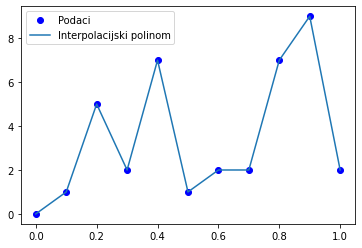

In [8]:
x = np.array([0.0, 0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.0,1,5,2,7,1,2, 2,7, 9, 2])

V = np.vander(x, len(x), increasing=True)

a = np.linalg.solve(V, y)

c = np.flipud(a)
f = np.polyval(c, x)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(x, f, label='Interpolacijski polinom')
plt.legend(loc='upper left')

3 . Za podatke iz 2. zadatka upotrijebite funkciju polyfit [link](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), te aproksimirajte podatke, polinomom stupnja 1,2, 10. Ovo je aproksimacija u smislu najmanjih kvadrata! Dobivamo li za $n=10$ intepolacijski polinom? (vidi predavanja. skripta: Metoda najmanjih kvadrata)

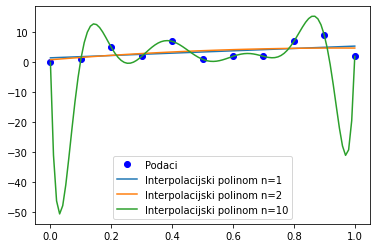

In [6]:
pf = np.polyfit(x, y, 1)
linspace = np.linspace(0, 1, 100)
pv = np.polyval(pf, linspace)

plt.plot(x, y, 'bo', label="Podaci")
plt.plot(linspace, pv, label='Interpolacijski polinom n=1')

pf = np.polyfit(x, y, 2)
pv = np.polyval(pf, linspace)

plt.plot(linspace, pv, label='Interpolacijski polinom n=2')

pf = np.polyfit(x, y, 10)
pv = np.polyval(pf, linspace)

plt.plot(linspace, pv, label='Interpolacijski polinom n=10')
plt.legend(loc='lower center')


4 .  Prema dostupnim informacijama na raspolaganju su nam sljedeći podaci o broju stanovnika u Hrvatskoj

$$\begin{array}{|c|c|} t_i& p_i \\ \hline \hline \\
1964. & 4259680\\
1969. & 4387000\\
1974. & 4497000\\
1979. & 4571000\\
1984. & 4680000\\
1989. & 4767000\\
1994. & 4650000\\
1999. & 4554000\\
2004. & 4439000\\
2009. & 4432001
\end{array}$$ 

Također poznata je informacija da je 2011. godine bilo $4456096$ stanovnika. Zadane podatke interpolirajte potom koristeći kubni splajn [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) ili [link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) kao što je to napravljeno u Jupyter bilježnici s predavanja. Nacrtajte graf toga splajna, te procijenite broj stanovnika u 2011. Izračunajte apsolutnu pogrešku. (Za pomoć vidi Jupyter bilježnicu s predavanja o splajnovima, ili sam početak interpolacije)

47931.06868567411


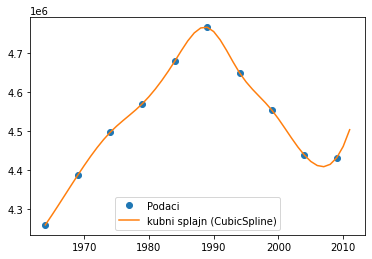

In [29]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])

#y_cubic   = interp1d(x, y, kind='cubic')
y_cubic_spline = CubicSpline(x, y)

x2 = np.linspace(1964.0,2011.0,48)

plt.plot(x, y, 'o', label='Podaci')
#plt.plot(x2, y_cubic(x2), label='kubni splajn (interp1d)')
plt.plot(x2, y_cubic_spline(x2), label='kubni splajn (CubicSpline)')
plt.legend(loc='lower center')

predicted_population = y_cubic_spline(2011)
actual_population = 4456096

abs_error = abs(predicted_population - actual_population)
print(abs_error)

5 .   Zadane podatke iz 4. zadatka  interpolirajte najprije koristeći polinomijalnu interpolaciju tako da iskoristite funkcije *lagrange* i *polyfit* koje ste koristili u 1. i 4. zadatku. Prikažite rezultate na zasebnim grafovima. Prolaze li podaci interpolacijskim točkama? (Za pomoc vidi kako je upotijebljena polyfit funkcija u predavanjima (skripta: metoda najmanjih kvadrata))

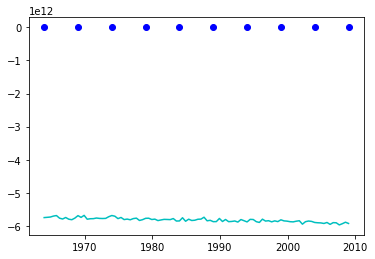

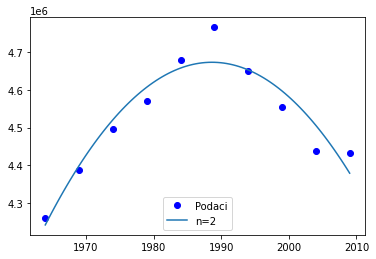

In [59]:
x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])

xp = np.linspace(1964.0, 2009.0, 100)

poly = lagrange(x, y)

plt.plot(x, y, 'bo', label='Podaci')
plt.plot(xp, poly(xp), 'c-', label='Polinom')
plt.figure(0)

pf = np.polyfit(x, y, 2)
pv = np.polyval(pf, xp)

plt.plot(x, y, 'bo', label='Podaci')
plt.plot(xp, pv, label='n=2')
plt.legend(loc='lower center')

6 .  Sada za podatke iskoristite funkcije s predavanja te interpolirajte dane podatke u 4. zadatku Newtonovim interpolacijskim polinomom. implementacija s predavanja je dana u nastavku. (Za pomoc vidi Jupyter biljeznicu o Newtonovom interpolacijskom polinomu)

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def evalPoly(c,x,xu):
    n = len(x) - 1 # Degree of polynomial
    p = c[n]
    for k in range(1,n+1):
        p = c[n-k] + (xu -x[n-k])*p
    return p

def polycoef(x,y):
    n = len(x) # Number of data points
    c = y.copy()
    for j in range(1,n):
        c[j:n] = (c[j:n] - c[j-1])/(x[j:n] - x[j-1])
    return c

def NewtonInterp(x,y,xu): # ovdje kao ulaz idu podaci x i y a u točka xu se polinom izvrednjava
    c = polycoef(x,y)
    yu = evalPoly(c,x,xu)
    #print(yu)
    return yu


xp = np.linspace(1964.0, 2009.0, 100)
yu = NewtonInterp(x,y,xp)

fig, ax = plt.subplots(figsize=(6.5, 4))   
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(xp, yu,label="yInterp")
ax.legend(loc='upper right')

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

7 .  Upotrijebite trapezno pravilo s predavanja ili ono iz vec implementiranih funkcija u bibliotekama da izračunate vrijednost integrala $\int_0^{\sqrt{\pi}}2x^2\cos(x^2)\, dx$. Broj točaka uzmite po vlastitom izboru. ( za pomoc vidi Jupyter bilježnicu Numerička integracija)

In [114]:
from scipy import integrate

xp = np.linspace(0, np.sqrt(np.pi), 100, endpoint=True)
yp = 2 * xp**2 * np.cos(xp**2)

approx = np.trapz(yp, xp)


func = lambda x: 2 * x**2 * np.cos(x**2)

exact = integrate.quad(func, 0, np.sqrt(np.pi))[0]

print('Approx={}, Exact={}'.format(approx, exact))
abs_error = abs(approx - exact)
print('Error={}'.format(abs_error))

Approx=-0.8950209062935149, Exact=-0.8948314694841443
Error=0.00018943680937066887


8 . Upotrijebite Rombergov algoritam da izračunate $\int_0^{\sqrt{\pi}}2x^2\cos(x^2)\, dx$ (za pomoc vidi Jupyter bilježnicu Numerička integracija)

In [115]:
from scipy import integrate
from numpy import sin

result = integrate.romberg(func, 0, np.sqrt(np.pi), show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f6937d39af0> from [0, 1.7724538509055159]

 Steps  StepSize   Results
     1  1.772454 -5.568328 
     2  0.886227 -1.799813 -0.543642 
     4  0.443113 -1.034769 -0.779755 -0.795496 
     8  0.221557 -0.925214 -0.888695 -0.895958 -0.897553 
    16  0.110778 -0.902166 -0.894484 -0.894870 -0.894852 -0.894842 
    32  0.055389 -0.896649 -0.894810 -0.894832 -0.894831 -0.894831 -0.894831 
    64  0.027695 -0.895285 -0.894830 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 
   128  0.013847 -0.894945 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 

The final result is -0.894831469484154 after 129 function evaluations.


9 . Prouči funkciju [link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) ili [link](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq) , upotrijebite neku od ovih funkcija na matricu $A$ i $y$ po izboru da riješite preodređeni sustav $Ax=y$. (smijete preuzeti i neki primjer koji smo radili na vježbama)

In [116]:
A = np.array([[1, 1, 2], [2, 1, 0], [1, 2, 2]])
y = np.array([1, 2, 3])
print(np.linalg.lstsq(A, y, rcond=None)[0])
print(np.array([0, 2, -1/2])) # točna rješenja

[-8.40608792e-16  2.00000000e+00 -5.00000000e-01]
[ 0.   2.  -0.5]


10 .  Odredi SVD dekompoziciju matrice $A$ odabrane po vlastitom izboru. (za pomoc vidi [link](https://nbviewer.org/github/anazga/FER3-nummat/blob/main/17.predavanje.ipynb)), potom ispišite singularne vrijednosti koristeći funkciju [link 2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svdvals.html). Nakon toga ispišite svojstvene vrijednosti matrice $A^TA$ koristeći funkciju [link 3](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.linalg.eigvalsh.html#scipy.linalg.eigvalsh)

In [117]:
from scipy.linalg import svdvals
from scipy.linalg import eigvalsh

A=np.array([[1.0, 2.0, 3.0 ],[3, 5.0, 7.0], [2.0, 7.0, 9.0], [3,2,1]])

print(np.linalg.svd(A))
print(svdvals(A))
print(eigvalsh(np.dot(A.T, A)))

(array([[-2.42673503e-01, -1.85001193e-02,  3.37989207e-01,
        -9.09137290e-01],
       [-5.90346523e-01,  1.87035599e-01,  6.73233512e-01,
         4.04061018e-01],
       [-7.49103832e-01, -3.57914448e-01, -5.57441205e-01,
        -9.43689571e-16],
       [-1.77324567e-01,  9.14643471e-01, -3.48968821e-01,
        -1.01015254e-01]]), array([15.38681237,  2.78681182,  0.69259283]), array([[-0.26281561, -0.58722076, -0.76557151],
       [ 0.92245489,  0.07968373, -0.3777929 ],
       [ 0.28285143, -0.80549506,  0.52074253]]))
[15.38681237  2.78681182  0.69259283]
[  0.47968483   7.76632012 236.75399505]
